# Lab 5 - Classification : Naive Bayes and Logistic Regression

# Optical recognition of handwritten digits dataset
**Download dataset from sklearn. The dataset has 10 classes and 64 attributes (8x8 images). Visualise images from the dataset. Perform a train test split in the ratio 4:1.**

# Using sklearn (25 points)

**For this exercise, you will use the naive bayes and logistic regression functions in sklearn. Use the optical recognition dataset.**


**a) Logistic Regression - use one vs all classification method to classify the dataset into one of the ten classes. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too). Tune parameters to obtain the best results.**

**b) Naive Bayes - perform multiclass classification to classify the dataset into one of the ten classes. Experiment with all the priors available (Gaussian, Bernoulli, etc) and report the best prior. Report the accuracies in terms of F1 scores and the confusion matrix (use sklearn functions for this too).**

**Estimated Time: 50 mins**

The images in the dataset are as follows :


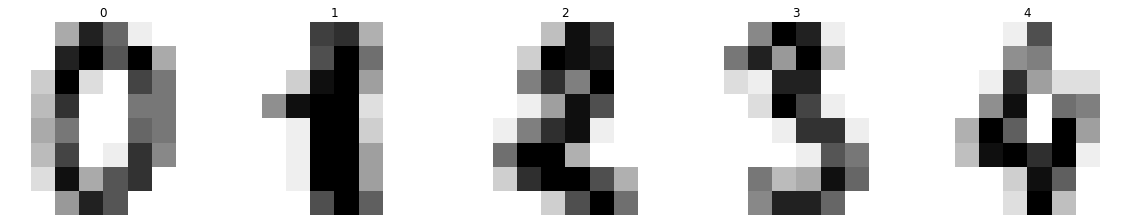

In [29]:
# Code here
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV


# loading the dataset
Digits = load_digits()

# visualizing the data
print("The images in the dataset are as follows :")
# plotting
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(Digits.images[i],cmap=plt.cm.gray_r)
    plt.axis('off')
    plt.title(str(Digits.target[i]))


In [14]:
# training and testing splitting
X_train, X_test, Y_train, Y_test = train_test_split(Digits.data, Digits.target, test_size = 0.2, random_state = 0)
# Ensuring correct splitting
print('The dimension of the original dataset is', Digits.data.shape)
print("The dimension of the training data is: ", X_train.shape)
print("The dimension of the test data is: ", X_test.shape)
print("\n===============train - test splitting done ============\n")

The dimension of the original dataset is (1797, 64)
The dimension of the training data is:  (1437, 64)
The dimension of the test data is:  (360, 64)

===============train - test splitting done ============



# (a - part) Logistic Regression

In [25]:
# Logistic Regression without tuning
LogReg = LogisticRegression()
LogReg.fit(X_train, Y_train)

# prediction
Y_pred = LogReg.predict(X_test)

# F1 score
print("F1 score :")
print(metrics.f1_score(Y_test,Y_pred,average = "micro"))   # since it is a multiclass problem, we should specify average = micro

# confusion matrix
print("\nConfusion matrix : ")
print(metrics.confusion_matrix(Y_test, Y_pred))

# mislabeled points
print("\nThe number of mislabeled points out of "+str(len(X_test))+" points :",(Y_test != Y_pred).sum())

F1 score :
0.9500000000000001

Confusion matrix : 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]

The number of mislabeled points out of 360 points : 18


In [38]:
# Tuning the parameters using GridsearchCV
range_c = np.logspace(-3,3,50)
parameters = {'C': range_c}
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv = 5)
clf.fit(X_train,Y_train)
print("The optimal C value is :", clf.best_params_['C'])

The optimal C value is : 0.09102981779915217


In [41]:
# For the best parameters found, applying logistic regression
LogReg = LogisticRegression(C = clf.best_params_['C'])
LogReg.fit(X_train, Y_train)

# prediction
Y_pred = LogReg.predict(X_test)

# F1 score
print("F1 score :")
print(metrics.f1_score(Y_test,Y_pred,average = "micro"))   # since it is a multiclass problem, we should specify average = micro

# confusion matrix
print("\nConfusion matrix : ")
print(metrics.confusion_matrix(Y_test, Y_pred))

print("\nClassification report for logistic regression classifier \n")
print((metrics.classification_report(Y_test, Y_pred)))

# mislabeled points
print("\nThe number of mislabeled points out of "+str(len(X_test))+" points :",(Y_test != Y_pred).sum())

F1 score :
0.9583333333333334

Confusion matrix : 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  1  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  1  0  1  0  0  3 36]]

Classification report for logistic regression classifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.89      0.94      0.92        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       0.97      1.00      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       1.00      0.95      0.97        39
           8       0.90      0.92      0.91        39
           9     

# Results :

- Logistic regression is performing very well on the given dataset, after tuning the inverse of regularization parameter,C 
    - f1 score = 0.9583
    - 15 images are mislabeled, out of 360 in test dataset.

# Naive Bayes Classification

In [43]:
# Gaussian prior
from sklearn.naive_bayes import GaussianNB
Gnb = GaussianNB()
Gnb.fit(X_train,Y_train)
# prediction
Y_pred = Gnb.predict(X_test)

# F1 score
print("F1 score :")
print(metrics.f1_score(Y_test,Y_pred,average = "micro"))   # since it is a multiclass problem, we should specify average = micro

# confusion matrix
print("\nConfusion matrix : ")
print(metrics.confusion_matrix(Y_test, Y_pred))

# mislabeled points
print("\nThe number of mislabeled points out of "+str(len(X_test))+" points :",(Y_test != Y_pred).sum())

F1 score :
0.825

Confusion matrix : 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  4  0]
 [ 0  7 17  0  0  0  0  0 12  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 22  0  0  7  0  0]
 [ 0  1  0  0  0 35  0  3  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  5  0  0  0  1  0  1 32  0]
 [ 0  2  0  3  0  0  0  3  7 26]]

The number of mislabeled points out of 360 points : 63


In [44]:
# Multinomial prior
from sklearn.naive_bayes import MultinomialNB
Mnb = MultinomialNB()
Mnb.fit(X_train,Y_train)
# prediction
Y_pred = Mnb.predict(X_test)

# F1 score
print("F1 score :")
print(metrics.f1_score(Y_test,Y_pred,average = "micro"))   # since it is a multiclass problem, we should specify average = micro

# confusion matrix
print("\nConfusion matrix : ")
print(metrics.confusion_matrix(Y_test, Y_pred))

# mislabeled points
print("\nThe number of mislabeled points out of "+str(len(X_test))+" points :",(Y_test != Y_pred).sum())

F1 score :
0.9083333333333333

Confusion matrix : 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 25  6  0  0  1  0  0  0  3]
 [ 1  2 31  0  0  0  0  0  1  1]
 [ 0  0  1 26  0  0  0  0  1  1]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 34  0  0  0  6]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  0  0  0  0  1 35  0]
 [ 0  0  0  0  0  0  0  3  1 37]]

The number of mislabeled points out of 360 points : 33


In [45]:
# Bernoulli prior
from sklearn.naive_bayes import BernoulliNB
Bnb = BernoulliNB()
Bnb.fit(X_train,Y_train)
# prediction
Y_pred = Bnb.predict(X_test)

# F1 score
print("F1 score :")
print(metrics.f1_score(Y_test,Y_pred,average = "micro"))   # since it is a multiclass problem, we should specify average = micro

# confusion matrix
print("\nConfusion matrix : ")
print(metrics.confusion_matrix(Y_test, Y_pred))

# mislabeled points
print("\nThe number of mislabeled points out of "+str(len(X_test))+" points :",(Y_test != Y_pred).sum())

F1 score :
0.8444444444444444

Confusion matrix : 
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 20  8  0  0  0  0  0  5  2]
 [ 0  1 29  4  0  0  0  1  1  0]
 [ 0  0  1 25  0  0  0  0  1  2]
 [ 0  0  0  0 28  0  0  2  0  0]
 [ 1  1  0  1  0 32  0  0  0  5]
 [ 0  1  0  0  1  1 41  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  4  0  1  0  0  0  1 31  2]
 [ 0  0  0  3  2  1  0  2  1 32]]

The number of mislabeled points out of 360 points : 56


# Observations :

- Using multinomial prior, we get the best f1 score of 0.9083 , compared to Gaussian prior(0.825) and Bernoulli prior (0.8444). 
- So, Multinomial prior is the best prior.
- Bernoulli prior is better than gaussian prior.

# The End